# EE 538: Analog Circuits for Sensor Systems
## Autumn 2020
## Instructor: Jason Silver

## Announcements

 - Phase 1 of Design Project due 12/6
    - Jupyter Notebook (.ipyb) submission on Canvas
    - For LTspice problems, include image (e.g. screen capture) of schematic(s)
 - Phase 2 submission due 12/19

## Week 9

 - Art of Electronics (AoE) Chapter 13

## Overview

 - Last time...
     - Noise filtering
     - Butterworth, Chebyshev, and Bessel filters
     - Sallen–Key filter architecture
 - Today...
     - Representation of signals
     - Sampling/aliasing
     - Quantization

## Python packages/modules

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy.fft import fft
from scipy.io import wavfile
import csv
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_logx2y(x, y1, y2, xlabel, ylabel, y1label, y2label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogx(x, y1, 'b')
    ax.semilogx(x, y2, 'r', marker = 'o', markersize ='3', linestyle='None')
    ax.legend( [y1label,y2label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_x2y(x, y1, y2, xlabel, ylabel, y1label, y2label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y1)
    ax.plot(x, y2)
    ax.legend( [y1label,y2label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    
def plot_logx3y(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogx(x, y1)
    ax.semilogx(x, y2)
    ax.semilogx(x, y3)
    ax.legend( [y1label,y2label,y3label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
 
def plot_x3y(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y1)
    ax.plot(x, y2)
    ax.plot(x, y3)
    ax.legend( [y1label,y2label,y3label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel, ymin, ymax):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    ax.set_ylim(ymin,ymax)
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))
    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

def plot_freqtrans(f, mag, x1label, y1label, tin, tran, x2label, y2label):
    fig, axs = plt.subplots(2, figsize = (10.0, 9));
    
    axs[0].semilogx(f, 20*np.log10(mag))       
    axs[0].grid()
    axs[0].set_xlabel(x1label)
    axs[0].set_ylabel(y1label)
        
    axs[1].plot(tin, tran)  
    axs[1].grid()
    axs[1].set_xlabel(x2label)
    axs[1].set_ylabel(y2label)
    
    fig.align_ylabels(axs[:])    
    
def plot_multifreqtrans(f, mags, x1label, y1label, tin, trans, x2label, y2label, labels):
    fig, axs = plt.subplots(2, figsize = (10.0, 9));
    
    for mag in mags:
        axs[0].semilogx(f, 20*np.log10(mag))
        
    axs[0].legend( labels ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.2))    
    axs[0].grid()
    axs[0].set_xlabel(x1label)
    axs[0].set_ylabel(y1label)
        
    for tran in trans:
        axs[1].plot(tin, tran)  
    axs[1].grid()
    axs[1].set_xlabel(x2label)
    axs[1].set_ylabel(y2label)
    
    fig.align_ylabels(axs[:])
    
def SK_lowpass(Q, cn, fc, n, C, K):
   
    d = (n*(1-K)+1)
    a = d**2*Q**2
    b = 2*Q**2*d-n
    c = a
    
    m_a = (-b+np.sqrt(b**2-4*a*c))/2/a
    m_b = (-b-np.sqrt(b**2-4*a*c))/2/a
    
    C1 = C
    C2 = n*C1
    R2 =1/fc/2/np.pi/C1/np.sqrt(m_b*n)/cn
    R1 = R2*m_b

    return C1, C2, R1, R2

def plot_fft_dB(freqs, mags, fmin, fmax):
    fig, ax = plt.subplots(figsize = (10.0,7.5))
    ax.plot(1e-3*freqs, 20*np.log10(mags), 'b')
    ax.set_xlim(fmin, fmax)
    ax.set_xlabel('Frequency [kHz]')
    ax.set_ylabel('Magnitude [dB]')
    ax.grid()
    
def fft_mag(x, N, T, t):
    fft_sig  = fft(x, N)  
    freqs = np.linspace(0.0, 1.0/(2.0*T), N//2)
    mags = 2.0/N * np.abs(fft_sig[0:N//2]) # single-sided FFT
    
    return freqs, mags

In [3]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

# Lecture 9 - Sampling and Quantization

## Analog vs digital

<center><b>Analog systems</b></center>

 - Continuous in amplitude and time, voltages typically limited by the supply rails
 - One wire/node represents many "bits" of information at a given time
 - Susceptible to offset, mismatch
 - Limit of resolution is physical noise (e.g. thermal, flicker), which accumulates with the number of stages


<center><b>Digital systems</b></center>

 - Discrete in amplitude and time, typically equal to either the upper (1) or lower (0) supply rail
 -  One wire/node represents only a single bit (0 or 1) of information at a given time
 - Computation is exact (no offset), and no sensitivity to mismatch
 - Limited by number of bits used to represent a signal, no accumulation of noise (except through precision errors)


## Fourier transform

 - Signals can be represented in the frequency domain using the Fourier Transform
 
 $$ F(j\omega) = \int_{-\infty}^{\infty}f(t) \cdot e^{-j\omega t}dt$$
   
     where $\omega$ is given in rads/sec and $j$ is the imaginary number ($j^2 = -1$)
 - Whereas the Laplace Transform allows us to transition between the time and frequency domains for *systems*, the Fourier Transform is our link between the two domains for *signals*

## Fourier transform of a sine wave

 - Applying Euler's formula, we can express a sine wave as 
 
$$ A \cdot \cos{\omega_1 t} = A \frac{e^{j\omega_1 t} + e^{-j\omega_1 t}}{2} $$

 - The Fourier transform is thus 

$$F(j\omega) = \frac{A}{2}\cdot [\int_{-\infty}^{\infty}e^{j\omega_1t}e^{-j\omega_1t}dt+\int_{-\infty}^{\infty}e^{-j\omega_1t}e^{-j\omega_1t}dt] $$

 - Applying the Fourier transform of a complex exponential results in 
 
$$F(j\omega) = \frac{A}{2}\cdot [\delta(\omega+\omega_1)+\delta(\omega-\omega_1)]$$
 - Which is just two unit impulse functions at $2\pi f_1$ and $-2\pi f_2$ 

## Impulse sampling

<center><img src="img/impulse_sampling.png" width=700/></center>

$$ V_{cont}(t) = V_p\cos{2\pi f_{in}t}  $$

$$ \delta(t-nT_s) \:\: when \:\: t = nT_s \:\: and \:\: 0 \:\: otherwise$$ 

$$ V_{smpl}(t) = V_{cont}(t) \cdot \delta(t-nT_s) $$

 - The output of an ideal ‘impulse’ sampler consists only of the values of the input occurring at integer multiples of the sampling clock period, $T_s$
 - Sampling is the operation of quantizing a signal in time, i.e. constraining the output to only have values at specific time points
 - Typically, these time points are spaced evenly in time

## Sampling operation

 - Assume we sample a sinusoidal signal with an ideal sampler 

$$ y(t) = \sum_{n = -\infty}^{\infty}V_p\cos(2\pi f_{in}t)\cdot \delta(t-nT_s)$$
 
 - where $f_{in}$ is the frequency of the input signal and $f_s = 1/T_s$ is the sampling frequency
 - The Fourier series of the resulting sequence $y(t)$ is

$$ Y(f) = \dfrac{V_p}{2T_s}\cdot[\delta(f-f_{in}-kf_s) + \delta(f+f_{in}-kf_s)]$$

 - which is a series of impulses in the frequency domain occurring at multiples of the sampling frequency $f_s$

## Spectrum of a sampled signal

<center><img src="img/sampled_spectrum.png" width=1200 /></center>

 - The sampling process produces “images” of the input spectrum at multiples of the sampling clock frequency
 - In order to avoid overlap between these images, the sampling frequency should be at least 2 times higher than the maximum frequency in the input
 - This requirement is often referred to as the “Nyquist criterion”
 - It is important to remember that __a digital signal can only uniquely represent signals at frequencies up to__ $f_s/2$ (this is called the Nyquist frequency)
 - Beyond $f_s/2$, there are only reflections/images of the Nyquist band

## Aliasing

<center><img src="img/aliasing.png" width=1000/></center>

 - The Nyquist criterion requires that $f_{in} \leq f_n$, where $f_n = f_s/2$ is the Nyquist frequency
 - Sampling causes "images" of the Nyquist band to occur at multiples of the sampling frequency
 - If the Nyquist criterion is violated, these “aliases” of the sampled spectrum overlap and fall into the Nyquist band, corrupting the sampled signal
 - The resulting in-band aliases produce distortion in the sampled waveform

## Aliasing (time domain)

 - The “analog” input is a sinusoidal signal with $f_{in} = 1kHz$
 - The input waveform is sampled at $f_s = 1.6kHz$ , violating the Nyquist criterion

In [4]:
f_in = 1e3
N = 2**10
t_sim = 10e-3
T = t_sim / N

# Original signal, sampled at ~100kHz
t = np.arange(0, t_sim, T) 
v_analog = np.sin(2*np.pi*f_in*t)

# Undersampled signal, sampled at 1.6kHz
n_undrsmpl = 64
t_undrsmpl = np.arange(0, t_sim, T*n_undrsmpl)
v_undrsmpl = np.sin(2*np.pi*f_in*t_undrsmpl) 
v_resmpl = signal.resample(v_undrsmpl, N)
v_s_f, v_s_mag = fft_mag(v_resmpl, N, T, t_sim)


 - The result is a sinusoid with frequency $f_s - f_{in} = 600Hz$, where $f_s$ is the sampling frequency of $1.6 kHz$
 -  Due to “undersampling,” information in the original signal is lost (forever!)

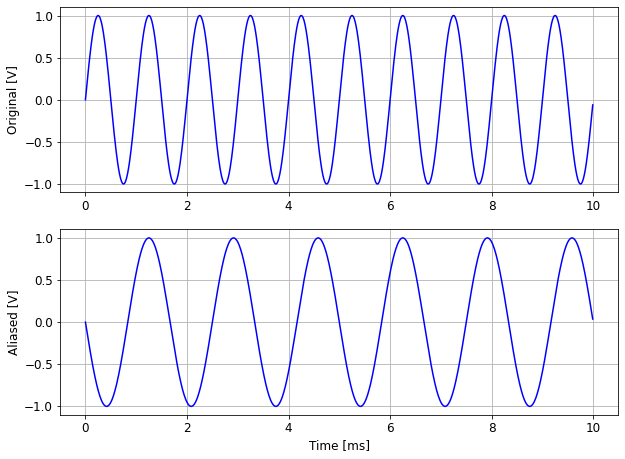

In [5]:
plot_xy2(1e3*t, v_analog, '', 'Original [V]', 
         1e3*t, v_resmpl, 'Time [ms]', 'Aliased [V]')

## Aliasing (frequency domain)

 - Looking at the FFT of the original signal, we see a peak at $1kHz$

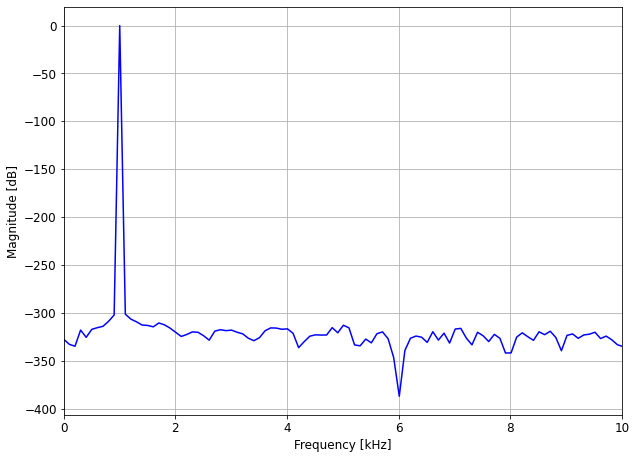

In [6]:
NFFT = 2**10
fft_freq_analog, fft_mag_analog = fft_mag(v_analog, NFFT, t_sim/NFFT, t_sim)
freq_abs_analog = fft_freq_analog*N/NFFT
plot_fft_dB(freq_abs_analog, fft_mag_analog*NFFT/N, 0, 10)  

In [7]:
print('The FFT peak in the original signal is at', np.argmax(fft_mag_analog)/t_sim, 'Hz')

The FFT peak in the original signal is at 1000.0 Hz


 - After aliasing, the peak is shifted to $600Hz$

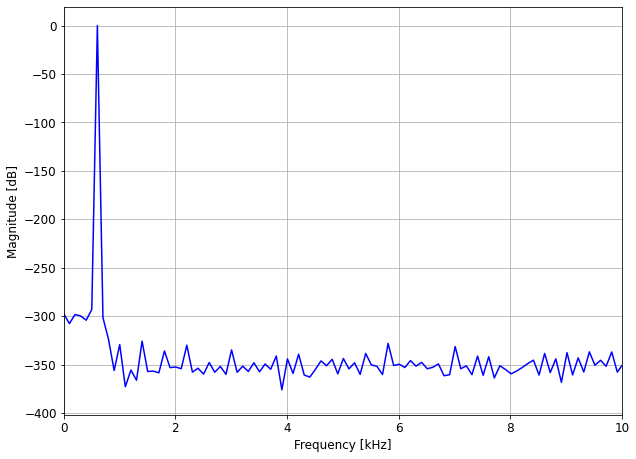

In [8]:
NFFT = 2**10
fft_freq_alias, fft_mag_alias = fft_mag(v_resmpl, NFFT, t_sim/NFFT, t_sim)
freq_abs_alias = fft_freq_alias*N/NFFT
plot_fft_dB(freq_abs_alias, fft_mag_alias*NFFT/N, 0, 10)  

In [9]:
print('The FFT peak now occurs at', np.argmax(fft_mag_alias)/t_sim, 'Hz')

The FFT peak now occurs at 600.0 Hz


## Sampled white noise

 - If the spectrum of sampled noise lies outside of the Nyquist band, it will be aliased just like any other signal
 - Here we take a look at white noise with a bandwidth of $500kHz$ and an $rms$ value of $10\mu V$

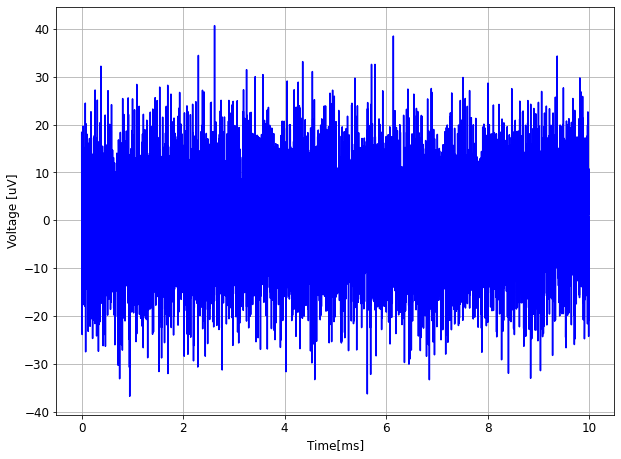

In [10]:
vn_rms = 10e-6
f_enb = 500e3
N = 10e-3*f_enb*2
t_cont = np.arange(N) / f_enb / 2
vn_cont = np.random.normal(0, vn_rms, size=t_cont.shape)
plot_xy(1e3*t_cont, 1e6*vn_cont, 'Time[ms]', 'Voltage [uV]')

In [11]:
print('The rms voltage is', np.std(vn_cont))

The rms voltage is 1.001189227567648e-05


 - Let's sample the original noise signal at $f_s = 100kHz$ (one tenth the orignal sample rate)

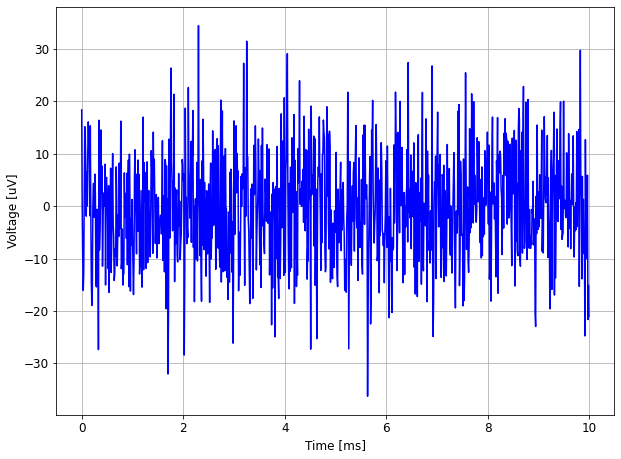

In [12]:
vn_sampled = vn_cont[::10]
t_sampled = t_cont[::10]
plot_xy(1e3*t_sampled, 1e6*vn_sampled, 'Time [ms]', 'Voltage [uV]')

 - The sampled noise appears more "sparse," but the $rms$ value remains the same as for the continuous-time noise

In [13]:
print('The rms voltage is ', np.std(vn_sampled))

The rms voltage is  1.0166586267966827e-05


## Noise spectrum

 - In the frequency domain, we can assess the effect of sampling by looking at the noise spectral density
 - The bandwidth of the "continuous-time" noise is $f_{enb} = 500kHz$, so the voltage spectral density is approximately $14nV/\sqrt{Hz}$

1.4157538158244896e-08

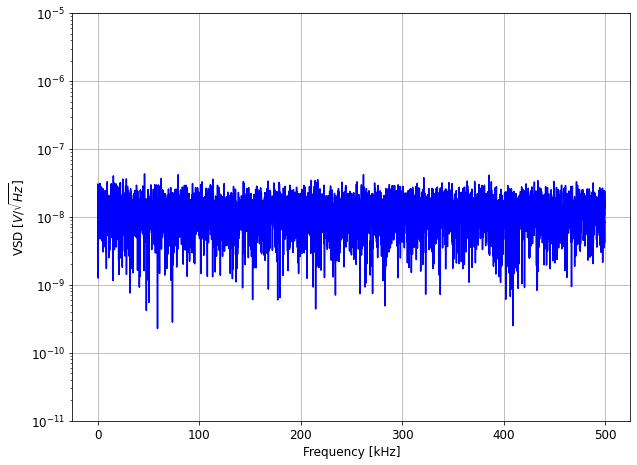

In [36]:
f, en_2_cont = signal.periodogram(vn_cont, f_enb*2)
plot_xlogy(1e-3*f[1:-1], np.sqrt(en_2_cont[1:-1]), 'Frequency [kHz]', r'VSD [$V/\sqrt{Hz}$]', 1e-11, 1e-5)
np.sqrt(np.mean(en_2_cont))

 - The $rms$ noise can be assessed in the frequency domain by integrating the PSD over the noise bandwidth

In [15]:
np.sqrt(np.sum(en_2_cont))

1.001189227567648e-06

 - After sampling, the noise falls into the Nyquist bandwidth $f_n = f_{enb}/10$
 - This results in a voltage spectral density that is $\sqrt{10}$ times higher than the original noise spectrum

4.5420957718657504e-08

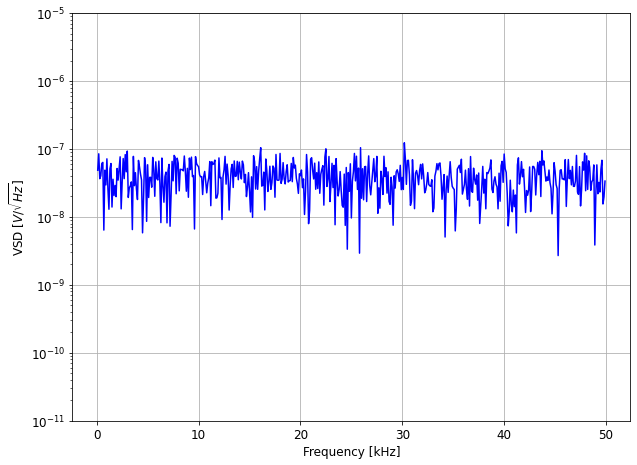

In [34]:
f_sampled, en_2_sampled = signal.periodogram(vn_sampled, f_enb*2/10)
plot_xlogy(1e-3*f_sampled[1:-1], np.sqrt(en_2_sampled[1:-1]), 'Frequency [kHz]', r'VSD [$V/\sqrt{Hz}$]', 1e-11, 1e-5)
np.sqrt(np.mean(en_2_sampled))

 - As in the time domain, the $rms$ noise should remain the same after sampling ($10\mu V$), since the noise bandwidth is reduced by the same factor by which the PSD increases

In [17]:
np.sqrt(np.sum(en_2_sampled))

1.0166586267966825e-06

## Anti-aliasing

<center><img src="img/spectrum_no_anti_aliasing.png" width=500/></center>

<center><img src="img/spectrum_with_anti_aliasing.png" width=500/></center>

 - To prevent information loss and other undesirable effects of aliasing, it is necessary to “bandlimit” the signal to be sampled to minimize content above $f_n = f_s/2$
 - However, no real-world signal is completely devoid of higher frequency content, so some amount of aliasing is inevitable
 - As analog designers, we should ensure that *no* signal and minimal noise exists above the Nyquist frequency

## Oversampling

 - Any noise that is aliased during the sampling process cannot be filtered from the Nyquist band
 - However, if we increase the sampling clock frequency above the Nyquist rate for the signal, we can filter digitally or in software to further improve SNR (relative to what it was in the analog domain)
 -  We define the oversampling ratio ($OSR$) as the ratio of $f_s$ to $2f_n$ (where $2f_n$ is the Nyquist sampling frequency)
 
$$ OSR = \dfrac{f_s}{2f_n} $$

 - Note that oversampling *must* be combined with filtering to realize a benefit

 - Here we have sampled a $100Hz$ sinusoidal signal and white noise with a noise bandwidth of $100kHz$ and a sampling frequency of $1MHz$

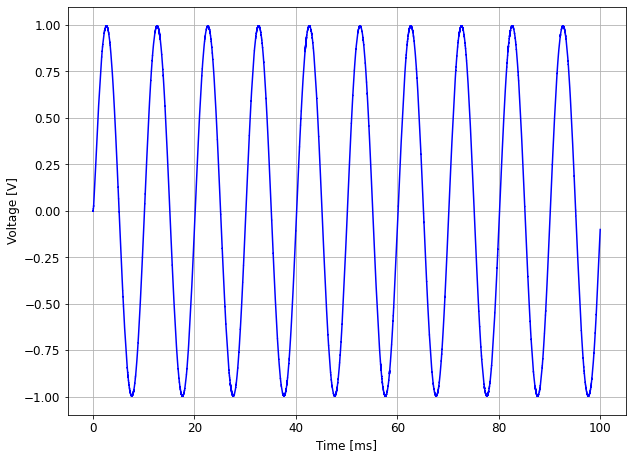

In [37]:
samplerate, data = wavfile.read('sampled_noise.wav')
time = np.arange(0,100e-3,1/samplerate)
if np.size(time) > np.size(data,0):
    time = time[0:np.size(data,0)]

# measured signal and noise votlages
vn_meas = data[0:np.size(time),0]*2/2**32
vsig_meas = data[0:np.size(time),1]/2**31
v_meas = vn_meas + vsig_meas

plot_xy(1e3*time, v_meas, 'Time [ms]', 'Voltage [V]')

 - From the PSD we can see the effect of analog filtering on the noise
 - We also note that the noise bandwidth is much wider than the Nyquist bandwidth for our $100Hz$ signal

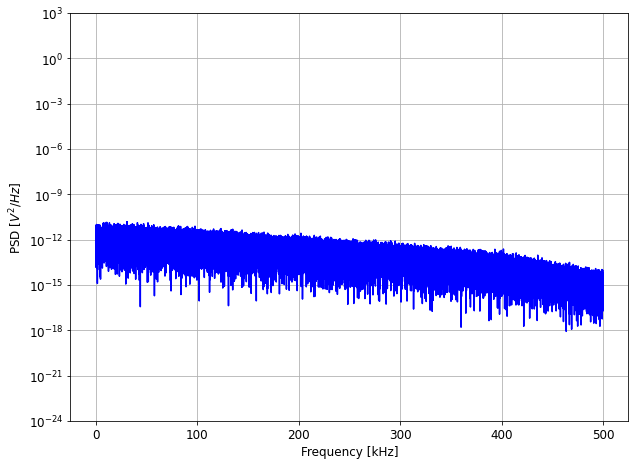

In [19]:
f, en_psd = signal.periodogram(vn_meas, fs=samplerate, nfft=np.size(v_meas))
plot_xlogy(1e-3*f[1:-2], en_psd[1:-2], 'Frequency [kHz]', r'PSD [$V^2/Hz$]', 1e-24, 1e3)

In [20]:
print('The rms amplitude of the sampled noise is', 1e6*np.sqrt(np.sum(en_psd)), 'uV')

The rms amplitude of the sampled noise is 152.17108803887973 uV


 - Because we have sampled much higher than the noise bandwidth, we can apply software filtering to further reduce the noise

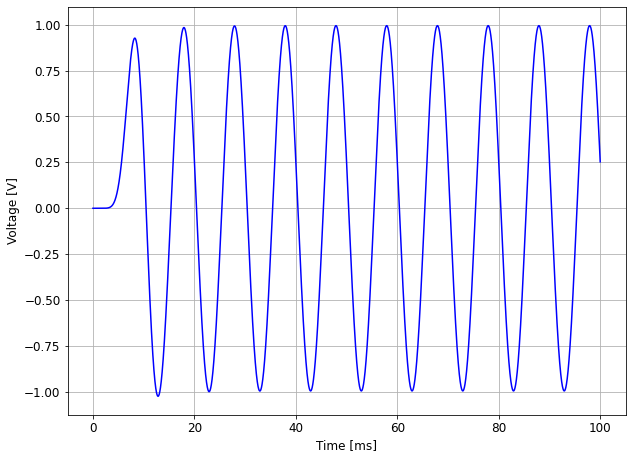

In [21]:
sos = signal.butter(10, 200, 'low', fs=samplerate, output='sos')
vsig_filt = signal.sosfilt(sos, vsig_meas)
vn_filt = signal.sosfilt(sos, vn_meas)
v_filt = vsig_filt + vn_filt
plot_xy(1e3*time, vsig_filt, 'Time [ms]', 'Voltage [V]')

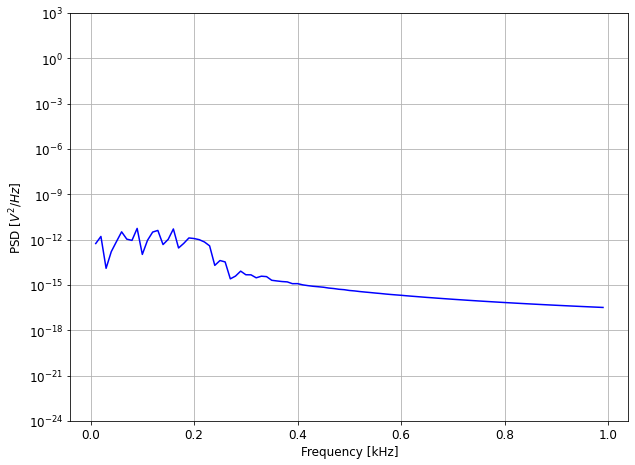

In [22]:
f, en_filt_psd = signal.periodogram(vn_filt, fs=samplerate, nfft=np.size(v_meas))
plot_xlogy(1e-3*f[1:100], en_filt_psd[1:100], 'Frequency [kHz]', r'PSD [$V^2/Hz$]', 1e-24, 1e3)

In [23]:
print('The rms amplitude of the filtered noise is', 1e6*np.sqrt(np.sum(en_filt_psd)), 'uV')

The rms amplitude of the filtered noise is 5.841047734252326 uV


## Quantization

<center><img src="img/quantization.png" width=1200/></center>

 - The conversion from an analog signal to a digital signal involves quantization in both time and amplitude
 - Quantization in time is the result of the sampling process, while quantization in amplitude is the result of the finite numerical precision of mixed-signal/digital systems

## 1-bit quantizer

<center><img src="img/comparator.png" width=600/></center>

<center><img src="img/comparator_characteristic.png" width=400/></center>

 - A 1-bit quantizer is a voltage comparator, which is essentially a high-gain amplifier operated in open loop (no feedback)
 - A small difference in the input voltage causes the output to swing high or low, depending on the polarity of the difference
 - The resulting output is a binary (i.e. digital) signal, with $V_{DD}$ representing a 1 and ground representing a 0

## Multi-bit quantizer

 - Multi-bit comparisons can be performed in parallel, as in a “flash” ADC
 - For example, if $V_{FS}/4 < V_{in} < V_{FS}/2$, bit $b_0$ is high (1), and bits $b_{1-2}$ are low (0), resulting in an output code 3’b001
 - For input values above $3V_{FS}/4$ or below $V_{FS}/4$, the converter is “saturated,” in that it cannot uniquely represent signals beyond these values
 - The number of resistors/comparators determines the resolution of the ADC (we need $N+1$ resistors and $N$ comparators)

<center><img src="img/multibit_quantizer.png" width=1000/></center>

## Quantization error

 - As the input to the quantizer is swept over its range, the quantization error is the difference between the actual value and the quantized value
 - The quantization error is limited by the quantization step size, $V_{LSB}$
 - $V_{LSB}$ can be decreased by reducing $V_{FS}$ (which reduces the input range of the ADC), or by decreasing the step size
 - In the Flash ADC example, a reducing in $V_{LSB}$ would be achieved by increasing the number of resistors and comparators 

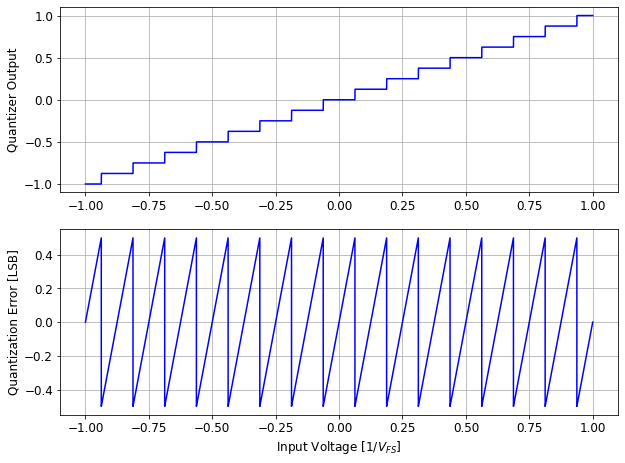

In [39]:
nbits = 4
lsb = 2/2**nbits
v_continuous = np.linspace(-1, 1, 2**20)
v_quantized = np.round(v_continuous / lsb) * lsb
plot_xy2(v_continuous, v_quantized,'', 'Quantizer Output', v_continuous, (v_continuous-v_quantized)/lsb,
         r'Input Voltage [$1/V_{FS}$]', 'Quantization Error [LSB]')

 - The $rms$ value of the quantization error is given by

$$ v_{nq(rms)} = \sqrt{ \dfrac{1}{T} \int_0^T\left( \dfrac{V_{LSB}}{2} - \dfrac{V_{FS}}{T} \cdot t \right)^2 dt } = \dfrac{V_{LSB}}{\sqrt{12}} $$

In [42]:
np.std((v_continuous-v_quantized)/lsb)

0.28867499694361787

## Quantization noise

 - Viewed as a function of time, the quantization error will appear as a random signal for input signals that are "busy" enough
 - Note that this generally requires that the analog noise have a higher amplitude than the quantization error to effectively "exercise" the ADC quantization levels
 - The amplitude of the quantization noise voltage $v_{nq}$ at any given point in time is in the range
 
$$ -\dfrac{V_{LSB}}{2} < v_{nq} < \dfrac{V_{LSB}}{2}   $$

 - Assuming the quantization noise is “random enough,” the probability is the same for any value in this range

## Quantization noise amplitude

<center><img src="img/quantization_error_amplitude.png" width=800/></center>


$\rho$: probability density

$v_{qe}$: quantization error

$V_{LSB}$: quantization step (least significant bit)

- Unlike resistor thermal noise, which has a normal (Gaussian) probability density function, the probability density for quantization noise is uniform in the range $-V_{LSB}/2$ to $V_{LSB}/2$
- That is, at any given point in time the quantization error is equally likely to be any value in this range
- For a sufficiently “busy” input signal, the quantitation error appears as random noise in time


## Quantization noise spectral density

 - This random noise signal occupies a bandwidth determined by the sample frequency (i.e. the sample frequency sets the noise bandwidth)
 - The $rms$ value of the quantization noise is given by

$$ v_{nq(rms)} = \dfrac{V_{LSB}}{\sqrt{12}} $$

 - The noise bandwidth is the Nyquist bandwidth $f_n = f_s/2$
 - The mean square quantization noise density (also called the noise power spectral density) is equal to the square of the $rms$ noise divided by the Nyquist bandwidth $f_n$:
 
$$ e_{nq}^2 = \dfrac{V_{LSB}^2}{12\cdot(f_s /2)} = \dfrac{V_{LSB}^2}{6f_s}$$


## Example: 16-bit quantization

<center><img src="img/16_bit_quantization.png" width=800/></center>


$$ V_{LSB} = \dfrac{V_{FS}}{2^N} = \dfrac{3.3V}{2^{16}} \approx 50.3 \mu V $$

$$ e_{nq} = \sqrt{\dfrac{V_{LSB}^2}{6f_s}} \approx 0.21 \mu V /\sqrt{Hz} $$

$$ v_{nq(rms)} = \dfrac{V_{LSB}}{\sqrt{12}} \approx 14.5 \mu V$$

 - Suppose we have a 16-bit ADC with a full-scale range of 3.3V and an impulse sampler sampling at 100ksps:
     - The input signal needs to fall within the range of the quantizer, and
     - The sampling frequency should satisfy the Nyquist criterion

 - Our input signal consists of a sinusoidal component with white noise that has an $rms$ amplitude 8 times that of the quantization noise

In [86]:
V_fs = 3.3
lsb = V_fs/2**16
t_sim = 1
N = 2**17
fin = 1e3
fs = 1e6
t = np.arange(0, t_sim, 1/fs)
vn_a_rms = 8*lsb/np.sqrt(12)

# Input signal plus white noise
vn_a = np.random.normal(0, vn_a_rms, t.shape)
v_analog = 1*np.sin(fin*2*np.pi*t) + V_fs/2 + vn_a

# quantization
v_quantized = np.round(v_analog/ lsb) * lsb

# quantization error only (no analog noise)
vn_q = v_analog - v_quantized

 - 16 bits of resolution represents the signal with high fidelity (to the naked eye, at least)

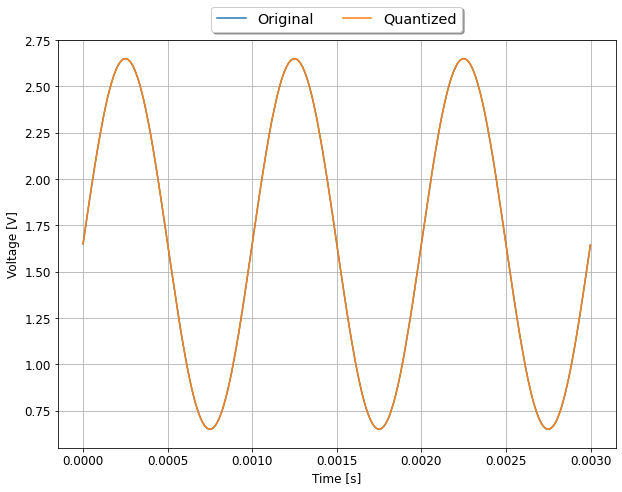

In [87]:
plot_x2y(t[0:3000], v_quantized[0:3000], v_analog[0:3000], 'Time [s]','Voltage [V]', 'Original', 'Quantized')

 - If the analog signal is "busy" enough, the quantization noise appears as a random voltage 

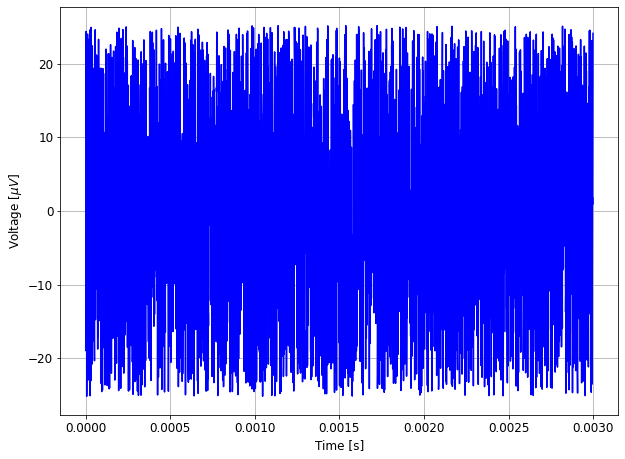

In [89]:
plot_xy(t[0:3000], 1e6*vn_q[0:3000], 'Time [s]',r'Voltage [$\mu V$]')

 - The $rms$ quantization error can be calculated from the time-domain noise

In [90]:
np.std(vn_q)

1.4535349941609775e-05

 - The quantization noise is distributed over the Nyquist bandwidth $f_s/2$

2.0556068465205332e-08

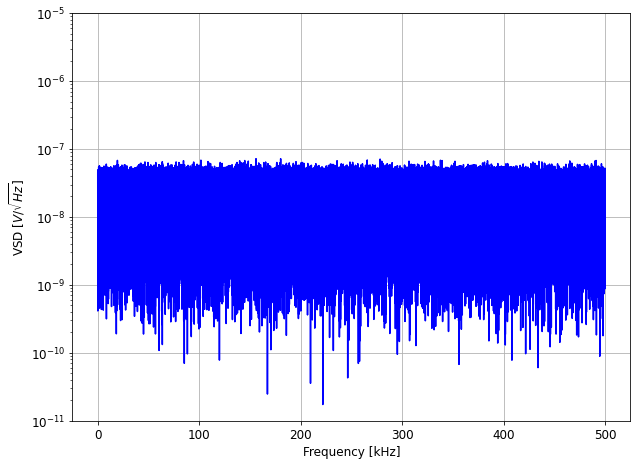

In [91]:
f, en_q_2 = signal.periodogram(vn_q,fs)
plot_xlogy(1e-3*f[1:-1], np.sqrt(en_q_2[1:-1]), 'Frequency [kHz]', r'VSD [$V/\sqrt{Hz}$]', 1e-11, 1e-5)
np.sqrt(np.mean(en_q_2))

 - The $rms$ quantization error can be calculated by integrating the noise density

In [80]:
np.sqrt(np.sum(en_q_2))

1.454818355800198e-05

## Signal-to-quantization noise ratio (SQNR)

 - If we increase the amplitude of the signal being quantized, the ratio between the $rms$ signal amplitude and $rms$ quantization noise increases, improving the signal-to-quantization-noise ratio (SQNR)
 - The SQNR is merely the ratio of the rms signal to the rms quantization noise:

$$ SQNR = 20 \log_{10} \dfrac{v_{sig(rms)}}{V_{LSB}/\sqrt{12}} $$

 - Similarly, if the quantization step size is reduced, the SQNR is increased
 - Typical designs are limited by thermal noise ($SNR$), not $SQNR$
 - In the case of the previous 16-bit design example,

$$ SQNR = 20 \log_{10}\dfrac{0.707V}{14.5\mu V} \approx 94 dB $$

## SQNR with oversampling

 - As with white noise, the power spectral density of quantization noise can be decreased by oversampling
 - The quantization noise density is given by

$$ e_{nq}^2 = \dfrac{V_{LSB}^2}{12\cdot(f_s /2)} $$

 - Like sampled white noise, this noise density depends on the sample frequency $f_s$
 - By increasing the sampling frequency beyond the Nyquist rate and then filtering up to the Nyquist bandwidth, we can decrease the RMS quantization noise:

$$ v_{nq(rms)} = \dfrac{V_{LSB}}{\sqrt{12}} \cdot \sqrt{\dfrac{2f_n}{f_s}} = \dfrac{V_{LSB}}{\sqrt{12}} \cdot \dfrac{1}{\sqrt{OSR}} $$

 - Once again, we will need to use filtering to reap the benefit of oversampling